# DC2 Sprinkler Validation Tests

The most recent Sprinkler Truth Catalogs are in `/global/cscratch1/sd/brycek/example_truth`.

Unlensed SNe population are in: `/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/sne_cosmoDC2_v1.1.4_MS_DDF.db`

In [1]:
import os
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

## Lensed AGN validation tests

In [4]:
hdulist = fits.open('/global/cfs/cdirs/descssim/DC2/Run3.0i/sprinkler_dc2_data/om10_qso_mock.fits')
om10_data = hdulist[1].data

In [5]:
om10_data[:3]

FITS_rec([(14428, 0, 2, 0.062, 264.2409, 0.2182095,  86.19403, 0.04307117, -172.995 , 4.01, -0.8669144, 0.2832836, 22.81, 22.94768, 3.858949, [ 0.9541, -2.7414,  0.    ,  0.    ], [-0.2678,  0.8434,  0.    ,  0.    ], [-0.8809,  3.8125,  0.    ,  0.    ], [26.034,  0.   ,  0.   ,  0.   ], [0., 0., 0., 0.], [0., 0., 0., 0.], 246.488327, 278.000397, -22.8653774, 14.4168491, 0.062, 1432.53, 1380.28, 0., 35956.6, 0., 0., 0.),
          (21703, 0, 2, 0.072, 165.1962, 0.286398 , 131.0021 , 0.06827481, -174.4367, 1.19, -0.4895263, 0.23893  , 22.55, 23.27365, 1.553578, [-1.2262,  0.1993,  0.    ,  0.    ], [ 0.5434, -0.0743,  0.    ,  0.    ], [ 1.8811, -0.5135,  0.    ,  0.    ], [ 0.   ,  7.601,  0.   ,  0.   ], [0., 0., 0., 0.], [0., 0., 0., 0.], 282.910126, 325.115814, -21.6407204, 15.9914694, 0.072, 1708.45, 1569.97, 0.,  8193.9, 0., 0., 0.),
          (31711, 0, 2, 0.082, 155.9553, 0.2997531, -19.01642, 0.05930104, -120.289 , 4.01,  0.1881534, 0.1275117, 22.51, 21.93714, 1.339839, [-0.30

In [7]:
example_truth_folder = '/global/cfs/cdirs/descssim/DC2/Run3.0i/truth_tables/'

In [9]:
conn = sqlite3.connect(os.path.join(example_truth_folder, 'updated_lensed_agn_truth.db'))

# Pick only the first image of each SN so we don't have duplicate entries of the same SNe
query = "SELECT * FROM lensed_agn WHERE image_number == 0;"

# DDF unlensed SNe
sprinkled_agn_df = pd.read_sql_query(query,conn)

In [10]:
sprinkled_agn_df.columns

Index(['index', 'unique_id', 'ra', 'dec', 'x_agn', 'y_agn', 'x_img', 'y_img',
       'redshift', 't_delay', 'magnorm', 'flux_u_agn', 'flux_g_agn',
       'flux_r_agn', 'flux_i_agn', 'flux_z_agn', 'flux_y_agn',
       'flux_u_agn_noMW', 'flux_g_agn_noMW', 'flux_r_agn_noMW',
       'flux_i_agn_noMW', 'flux_z_agn_noMW', 'flux_y_agn_noMW',
       'magnification', 'seed', 'agn_tau_u', 'agn_tau_g', 'agn_tau_r',
       'agn_tau_i', 'agn_tau_z', 'agn_tau_y', 'agn_sf_u', 'agn_sf_g',
       'agn_sf_r', 'agn_sf_i', 'agn_sf_z', 'agn_sf_y', 'av_mw', 'rv_mw',
       'lens_id', 'dc2_sys_id', 'lens_cat_sys_id', 'image_number',
       'total_magnification'],
      dtype='object')

## Check that the input magnifications and time delays match the sprinkled values

In [59]:
agn_cat_dir = '/global/cscratch1/sd/brycek/test_sprinkler_instance_catalogs/test_sprinkler_agn_ics'

In [60]:
full_agn_visits_df = pd.DataFrame([], columns=['obj_id', 'ra', 'dec', 'magnorm', 'sed', 'redshift', 'time'])
for cat_file in os.listdir(agn_cat_dir):
    if cat_file.startswith('test_cat') is False:
        continue
        
    time = float(cat_file.split('_')[2])
    cat_data = pd.read_csv(os.path.join(agn_cat_dir, cat_file), delimiter=' ', usecols=[1,2,3,4,5,6],
                           names=['obj_id', 'ra', 'dec', 'magnorm', 'sed', 'redshift'])
    cat_data['time'] = time
    full_agn_visits_df = full_agn_visits_df.append(cat_data)

In [61]:
full_agn_visits_df = full_agn_visits_df.reset_index(drop=True)

In [62]:
im_0 = full_agn_visits_df.query('obj_id == "GLAGN_20_0"')
im_1 = full_agn_visits_df.query('obj_id == "GLAGN_20_1"')
im_2 = full_agn_visits_df.query('obj_id == "GLAGN_20_2"')
im_3 = full_agn_visits_df.query('obj_id == "GLAGN_20_3"')

In [63]:
im_0

,obj_id,ra,dec,magnorm,sed,redshift,time
44,GLAGN_20_0,52.752289,-28.430322,21.840228,agnSED/agn.spec.gz,1.84,59595.39
2482,GLAGN_20_0,52.752289,-28.430322,21.810043,agnSED/agn.spec.gz,1.84,59582.89
4920,GLAGN_20_0,52.752289,-28.430322,21.851823,agnSED/agn.spec.gz,1.84,59589.14
7358,GLAGN_20_0,52.752289,-28.430322,21.845624,agnSED/agn.spec.gz,1.84,59587.64
9796,GLAGN_20_0,52.752289,-28.430322,21.833043,agnSED/agn.spec.gz,1.84,59619.64
...,...,...,...,...,...,...,...
965492,GLAGN_20_0,52.752289,-28.430322,21.858532,agnSED/agn.spec.gz,1.84,59601.54
967930,GLAGN_20_0,52.752289,-28.430322,21.879766,agnSED/agn.spec.gz,1.84,59600.04
970368,GLAGN_20_0,52.752289,-28.430322,21.715068,agnSED/agn.spec.gz,1.84,59627.89
972806,GLAGN_20_0,52.752289,-28.430322,21.812212,agnSED/agn.spec.gz,1.84,59602.89


In [64]:
example_truth_folder = '/global/cscratch1/sd/brycek/truth_checkpoints/'
conn = sqlite3.connect(os.path.join(example_truth_folder, 'updated_lensed_agn_truth.db'))

# Pick only the first image of each SN so we don't have duplicate entries of the same SNe
#query = "SELECT * FROM lensed_sne WHERE image_number == 0;"
query = "SELECT * FROM lensed_agn"

# DDF unlensed SNe
sprinkled_agn_df = pd.read_sql_query(query,conn)

In [65]:
sprinkled_agn_df.head()

,index,unique_id,ra,dec,x_agn,y_agn,x_img,y_img,redshift,t_delay,...,agn_sf_i,agn_sf_z,agn_sf_y,av_mw,rv_mw,lens_id,dc2_sys_id,lens_cat_sys_id,image_number,total_magnification
0,0,GLAGN_0_0,53.494374,-28.283800,-0.165630,0.112272,0.1132,-0.0756,1.06,0.000000,...,0.5863,0.5474,0.5190,0.032723,3.1,2.562505e+09,GLAGN_0,115074,0,2.949166
1,0,GLAGN_0_1,53.494201,-28.283683,-0.165630,0.112272,0.1132,-0.0756,1.06,-2.432431,...,0.5863,0.5474,0.5190,0.032723,3.1,2.562505e+09,GLAGN_0,115074,1,2.949166
2,2,GLAGN_1_0,52.566912,-27.584574,0.222652,0.487403,-0.5457,-0.9090,2.08,0.000000,...,0.3189,0.2975,0.2818,0.027206,3.1,1.875009e+09,GLAGN_1,125027,0,5.024002
3,2,GLAGN_1_1,52.567168,-27.583733,0.222652,0.487403,-0.5457,-0.9090,2.08,-28.796382,...,0.3189,0.2975,0.2818,0.027206,3.1,1.875009e+09,GLAGN_1,125027,1,5.024002
4,4,GLAGN_2_0,53.642295,-28.561889,-0.210878,0.161722,0.4150,-0.3968,2.89,0.000000,...,0.3927,0.3671,0.3482,0.022477,3.1,2.562528e+09,GLAGN_2,394519,0,4.991128


In [66]:
sys_truth = sprinkled_agn_df.query('dc2_sys_id == "GLAGN_20"')

In [67]:
sys_truth[['magnification', 't_delay']]

,magnification,t_delay
44,5.395855,0.000000
45,10.578537,1.667380
46,8.729795,1.291124
47,0.994190,29.684925


In [68]:
-2.5*np.log10(np.abs(sys_truth['magnification']))

44   -1.830151
45   -2.561064
46   -2.352510
47    0.006327
Name: magnification, dtype: float64

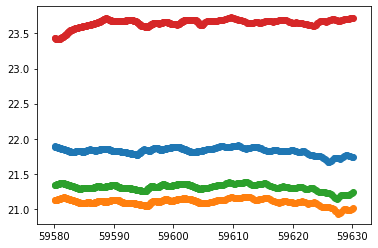

In [69]:
plt.scatter(im_0['time'], im_0['magnorm'])
plt.scatter(im_1['time'], im_1['magnorm'])
plt.scatter(im_2['time'], im_2['magnorm'])
plt.scatter(im_3['time'], im_3['magnorm'])

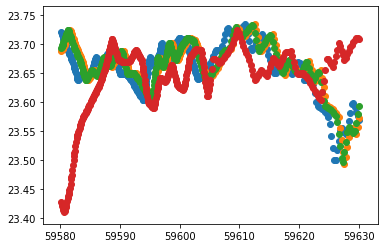

In [70]:
plt.scatter(im_0['time'], im_0['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[0]))
plt.scatter(im_1['time'], im_1['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[1]))
plt.scatter(im_2['time'], im_2['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[2]))
plt.scatter(im_3['time'], im_3['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[3]))

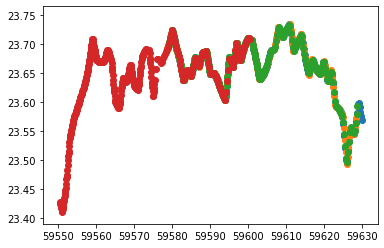

In [71]:
plt.scatter(im_0['time'] - sys_truth['t_delay'].iloc[0], im_0['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[0]))
plt.scatter(im_1['time'] - sys_truth['t_delay'].iloc[1], im_1['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[1]))
plt.scatter(im_2['time'] - sys_truth['t_delay'].iloc[2], im_2['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[2]))
plt.scatter(im_3['time'] - sys_truth['t_delay'].iloc[3], im_3['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[3]))

Text(0.5, 1.0, 'Magnorms corrected for magnification and time delay')

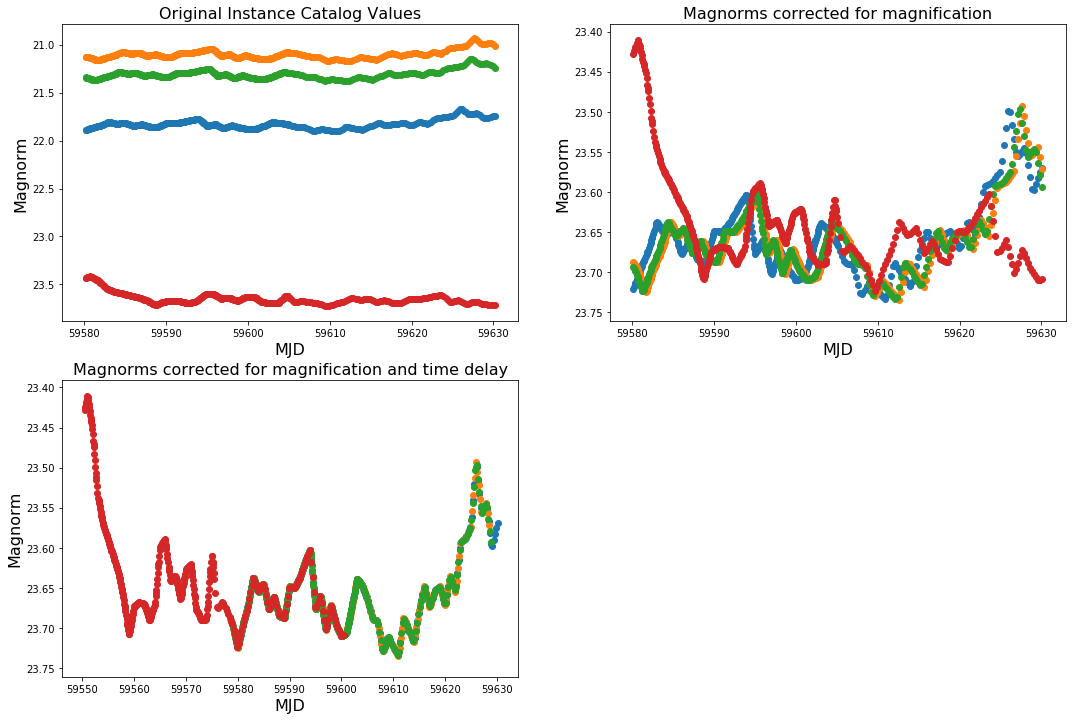

In [72]:
fig = plt.figure(figsize=(18, 12))
fig.add_subplot(2,2,1)
plt.scatter(im_0['time'], im_0['magnorm'])
plt.scatter(im_1['time'], im_1['magnorm'])
plt.scatter(im_2['time'], im_2['magnorm'])
plt.scatter(im_3['time'], im_3['magnorm'])
plt.xlabel('MJD', size=16)
plt.ylabel('Magnorm', size=16)
plt.gca().invert_yaxis()
plt.title('Original Instance Catalog Values', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

fig.add_subplot(2,2,2)
plt.scatter(im_0['time'], im_0['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[0]))
plt.scatter(im_1['time'], im_1['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[1]))
plt.scatter(im_2['time'], im_2['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[2]))
plt.scatter(im_3['time'], im_3['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[3]))
plt.xlabel('MJD', size=16)
plt.ylabel('Magnorm', size=16)
plt.gca().invert_yaxis()
plt.title('Magnorms corrected for magnification', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

fig.add_subplot(2,2,3)
plt.scatter(im_0['time'] - sys_truth['t_delay'].iloc[0], im_0['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[0]))
plt.scatter(im_1['time'] - sys_truth['t_delay'].iloc[1], im_1['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[1]))
plt.scatter(im_2['time'] - sys_truth['t_delay'].iloc[2], im_2['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[2]))
plt.scatter(im_3['time'] - sys_truth['t_delay'].iloc[3], im_3['magnorm']+2.5*np.log10(np.abs(sys_truth['magnification']).iloc[3]))
plt.xlabel('MJD', size=16)
plt.ylabel('Magnorm', size=16)
plt.gca().invert_yaxis()
plt.title('Magnorms corrected for magnification and time delay', size=16)
plt.xticks(size=14)
plt.yticks(size=14)


## Lensed SNe validation tests

#### Load necessary files

Unlensed SNe population files are in: `/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/` with filenames starting with `sne_cosmoDC2_v1.1.4*`

In [11]:
cosmoDC2_base = '/global/cfs/cdirs/descssim/DC2/cosmoDC2_v1.1.4/'

In [12]:
conn = sqlite3.connect(os.path.join(cosmoDC2_base, 'sne_cosmoDC2_v1.1.4_MS_DDF.db'))
query = "SELECT * FROM sne_params;"

# Unlensed SNe
unlensed_sne_df = pd.read_sql_query(query,conn)

In [14]:
conn = sqlite3.connect(os.path.join(example_truth_folder, 'sne_truth.db'))

# Pick only the first image of each SN so we don't have duplicate entries of the same SNe
query = "SELECT * FROM lensed_sne WHERE image_number == 0;"

# DDF unlensed SNe
sprinkled_sne_df = pd.read_sql_query(query,conn)

### SN Population Comparison

In [15]:
unlensed_sne_df.head()

,htmid_level_6,galaxy_id,c_in,mB,t0_in,x0_in,x1_in,z_in,snid_in,snra_in,sndec_in
0,9021,10562502111,0.035201,18.516489,60772.368515,0.000617,1.477374,0.077278,MS_10199_0,66.115587,-40.866055
1,9023,10562500822,-0.086665,17.966773,63060.297448,0.001028,0.576378,0.073256,MS_10199_1,66.662435,-42.042877
2,9021,10562500735,0.037553,19.078334,62832.166508,0.000370,-0.177457,0.068469,MS_10199_2,65.212146,-41.416473
3,9021,10562502246,0.076715,19.192019,61400.008116,0.000335,-1.344205,0.080189,MS_10199_3,65.469824,-41.109646
4,9023,10562504918,-0.012653,19.388848,61342.657248,0.000278,0.474204,0.115499,MS_10199_5,65.986211,-42.086708


In [16]:
sprinkled_sne_df.head()

,index,unique_id,gal_unq_id,ra,dec,t0,t_delay,MB,magnification,x0,x1,c,host_type,redshift,av_mw,rv_mw,dc2_sys_id,lens_cat_sys_id,image_number
0,0,1687501546316000,1687501546316000,52.848251,-27.656524,60733.028599,0.0,-19.241234,1.511290,0.000111,1.0,0.0,kinney-elliptical,0.175884,0.025116,3.1,2000,4068871,0
1,4,1687502575216008,1687502575216008,52.637745,-28.040920,60531.982206,0.0,-19.120594,2.261117,0.000086,1.0,0.0,kinney-starburst,0.188217,0.022862,3.1,2001,6724378,0
2,6,1687504325716016,1687504325716016,52.765482,-27.706339,62973.622594,0.0,-19.372602,2.326046,0.000059,1.0,0.0,kinney-sc,0.245165,0.025587,3.1,2002,9923868,0
3,8,1687506281016024,1687506281016024,52.532876,-28.020799,61523.740726,0.0,-19.106845,2.316066,0.000033,1.0,0.0,kinney-elliptical,0.283273,0.023863,3.1,2003,985566,0
4,10,1687506284916032,1687506284916032,52.655521,-27.958024,60094.543280,0.0,-19.213396,1.955134,0.000062,1.0,0.0,kinney-elliptical,0.226327,0.025395,3.1,2004,6615075,0


Text(0, 0.5, 'Population Density')

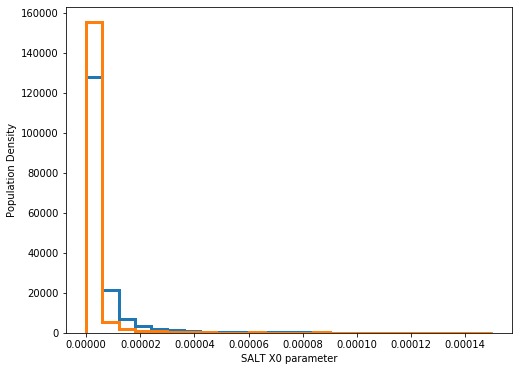

In [17]:
fig = plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(unlensed_sne_df['x0_in'], bins=25, range=(0.0, 0.00015), lw=3, histtype='step', density=True, label='Unlensed')
_ = plt.hist(sprinkled_sne_df['x0'], bins=bins, lw=3, histtype='step', density=True, label='Sprinkled')
plt.xlabel('SALT X0 parameter')
plt.ylabel('Population Density')